In [1]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [2]:
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "/train_df_ohe_selected_200.csv", keep_default_na=False)

y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='sag') # uses Stochastic Average Gradient descent solver

In [4]:
param_grid = {'max_iter': [100, 500, 1000, 5000, 10000]}
cv_results = tune_hyperparameter(logr, param_grid, X, y, cv=3)
cv_results
# max_iter>=500 works well

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .......................................max_iter=100; total time=  16.1s
[CV] END .......................................max_iter=100; total time=  15.8s
[CV] END .......................................max_iter=100; total time=  15.8s
[CV] END .......................................max_iter=500; total time=  39.5s
[CV] END .......................................max_iter=500; total time=  40.7s
[CV] END .......................................max_iter=500; total time=  41.5s
[CV] END ......................................max_iter=1000; total time=  38.8s
[CV] END ......................................max_iter=1000; total time=  40.5s
[CV] END ......................................max_iter=1000; total time=  41.7s
[CV] END ......................................max_iter=5000; total time=  37.8s
[CV] END ......................................max_iter=5000; total time=  40.8s
[CV] END ......................................ma

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'max_iter': 100},0.661229,0.015950,5,0.167462,0.001728,5,0.267212,0.002448,5,...,5,0.072660,0.010823,5,0.133178,0.018557,5,0.726792,0.001133,5
1,{'max_iter': 500},0.665341,0.018472,1,0.171214,0.001358,1,0.272318,0.002780,1,...,1,0.078712,0.013793,1,0.143353,0.023282,1,0.727919,0.001488,1
2,{'max_iter': 1000},0.665341,0.018472,1,0.171214,0.001358,1,0.272318,0.002780,1,...,1,0.078712,0.013793,1,0.143353,0.023282,1,0.727919,0.001488,1
3,{'max_iter': 5000},0.665341,0.018472,1,0.171214,0.001358,1,0.272318,0.002780,1,...,1,0.078712,0.013793,1,0.143353,0.023282,1,0.727919,0.001488,1
4,{'max_iter': 10000},0.665341,0.018472,1,0.171214,0.001358,1,0.272318,0.002780,1,...,1,0.078712,0.013793,1,0.143353,0.023282,1,0.727919,0.001488,1


LogisticRegression prediction took 557.2928760051727 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.679348    0.212947      0.324254       0.739130    0.964837   
1       0.685185    0.189097      0.296395       0.736176    0.969155   
2       0.703030    0.197952      0.308921       0.735929    0.967921   
3       0.640523    0.167235      0.265223       0.732585    0.966687   
4       0.743902    0.208191      0.325333       0.740845    0.973473   
5       0.684211    0.177474      0.281843       0.734426    0.967304   
6       0.678832    0.158703      0.257261       0.731108    0.972856   
7       0.692771    0.196246      0.305851       0.737435    0.968538   
8       0.682081    0.201022      0.310526       0.736000    0.965432   
9       0.654088    0.177172      0.278820       0.733365    0.966049   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837035       0.857143    0.060606      0.113208  0.7347

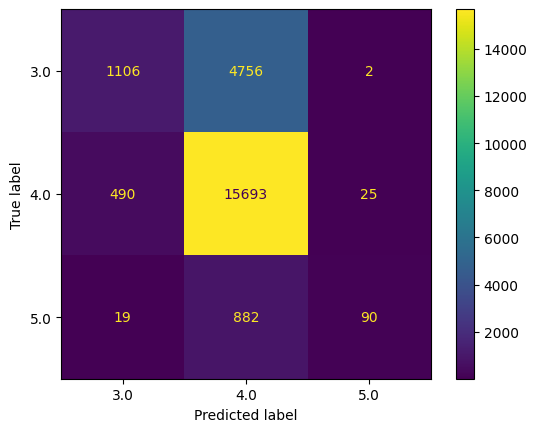

3.0_precision    0.684397
3.0_recall       0.188604
3.0_f1-score     0.295443
4.0_precision    0.735700
4.0_recall       0.968225
4.0_f1-score     0.836093
5.0_precision    0.782238
5.0_recall       0.090848
5.0_f1-score     0.161716
accuracy         0.732298
dtype: float64

In [5]:
logr = LogisticRegression(solver='sag', max_iter=500)
logr.fit(X, y)
cross_val_report(logr, X, y)[1]

## Attempt 2: Using selected features

In [6]:
selector = SelectFromModel(logr, prefit=True).fit(X, y)
print("LogR Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)
selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print(len(selected_features), "features selected")
X_filtered = X[selected_features]

LogR Coefficients: [[ 1.55606902e-01 -6.46897306e-04  7.95596444e-03 ... -9.20798694e-01
  -5.34971542e-03 -4.14369896e-01]
 [-8.11919605e-02 -7.15064753e-03  2.28855718e-03 ...  5.16353593e-01
  -1.97501267e-01 -2.84107176e-01]
 [-7.44149412e-02  7.79754484e-03 -1.02445216e-02 ...  4.04445101e-01
   2.02850983e-01  6.98477072e-01]]
Selector threshold: 1.4742630068295792
444 features selected


LogisticRegression prediction took 38.30836296081543 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.789062    0.172061      0.282517       0.733763    0.982727   
1       0.717557    0.160136      0.261838       0.731854    0.976558   
2       0.813008    0.170648      0.282087       0.733915    0.985194   
3       0.703704    0.129693      0.219020       0.724943    0.977175   
4       0.782258    0.165529      0.273239       0.733088    0.982727   
5       0.743802    0.153584      0.254597       0.732258    0.980259   
6       0.759615    0.134812      0.228986       0.727646    0.983961   
7       0.762712    0.153584      0.255682       0.731864    0.983344   
8       0.792308    0.175468      0.287308       0.734317    0.982716   
9       0.745763    0.149915      0.249645       0.730115    0.980247   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.840190       0.750000    0.060606      0.112150  0.7368

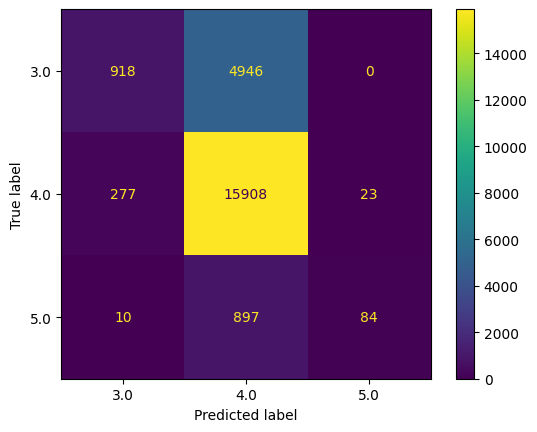

3.0_precision    0.760979
3.0_recall       0.156543
3.0_f1-score     0.259492
4.0_precision    0.731376
4.0_recall       0.981491
4.0_f1-score     0.838170
5.0_precision    0.789637
5.0_recall       0.084788
5.0_f1-score     0.152422
accuracy         0.733209
dtype: float64

In [7]:
logr.fit(X_filtered, y)
cross_val_report(logr, X_filtered, y)[1]

## Attempt 3: Applying Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=100, random_state=30027)
X_reduced = reducer.fit_transform(X_filtered)
X_reduced

array([[-7.22835752e-03, -1.15332378e-02, -9.18995370e-03, ...,
         1.32765447e-06, -7.12460204e-04,  7.48635745e-04],
       [-7.22835753e-03, -1.15332378e-02, -9.18995370e-03, ...,
         1.32765451e-06, -7.12460204e-04,  7.48635745e-04],
       [-7.22835752e-03, -1.15332378e-02, -9.18995370e-03, ...,
         1.32765448e-06, -7.12460204e-04,  7.48635745e-04],
       ...,
       [-7.22835752e-03, -1.15332378e-02, -9.18995370e-03, ...,
         1.32765447e-06, -7.12460204e-04,  7.48635745e-04],
       [-7.22835752e-03, -1.15332378e-02, -9.18995370e-03, ...,
         1.32765447e-06, -7.12460204e-04,  7.48635745e-04],
       [-7.22835752e-03, -1.15332378e-02, -9.18995370e-03, ...,
         1.32765447e-06, -7.12460204e-04,  7.48635745e-04]])

LogisticRegression prediction took 8.275031805038452 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.666667    0.071550      0.129231       0.713584    0.985194   
1       0.567568    0.071550      0.127080       0.713643    0.977791   
2       0.701754    0.068259      0.124417       0.713776    0.987662   
3       0.564516    0.059727      0.108025       0.712556    0.980259   
4       0.682540    0.073379      0.132512       0.715691    0.987662   
5       0.569444    0.069966      0.124620       0.714350    0.979642   
6       0.673469    0.056314      0.103937       0.713206    0.989513   
7       0.589286    0.056314      0.102804       0.711290    0.983344   
8       0.641791    0.073254      0.131498       0.713775    0.985185   
9       0.612903    0.064736      0.117103       0.712556    0.980864   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.827676       0.333333    0.020202      0.038095  0.7113

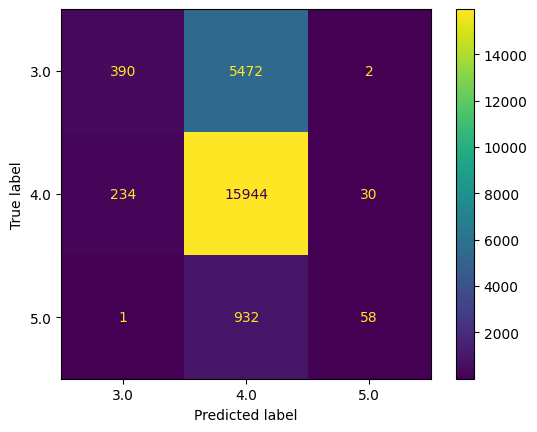

3.0_precision    0.626994
3.0_recall       0.066505
3.0_f1-score     0.120123
4.0_precision    0.713443
4.0_recall       0.983712
4.0_f1-score     0.827054
5.0_precision    0.672493
5.0_recall       0.058545
5.0_f1-score     0.106362
accuracy         0.710749
dtype: float64

In [9]:
logr.fit(X_reduced, y)
cross_val_report(logr, X_reduced, y)[1]

In [10]:
# Dimensionality reduction doesn't work well - Let's retain the original features